## Assignment 4

<br>

### Question 1
Investigate the model for predicting Diabetes disease progression by adding more explanatory variables to it in addition to `bmi` and `s5`.

a) Which variable would you add next? Why?

b) How does adding it affect the model's performance? Compute metrics and compare to having just `bmi` and `s5`.

d) Does it help if you add even more variables?

Include your own findings and explanations in code comments or inside triple quotes """...""".

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Step 1: Load the diabetes dataset (assuming it is available as a CSV file)
df = pd.read_csv('diabetes.csv')  # Replace 'diabetes.csv' with the correct file name

# Inspect the dataset to check the columns and find relevant features
print(df.head())

# Step 2: Start with the base model using only 'bmi' and 's5'
# The target variable is typically 'disease progression'
X_base = df[['bmi', 's5']]  # Base features
y = df['DiseaseProgression']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)

# Fit the model using linear regression
model_base = LinearRegression()
model_base.fit(X_train, y_train)

# Predict and evaluate the model's performance
y_pred_base = model_base.predict(X_test)

# Calculate RMSE and R² for the base model
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
r2_base = model_base.score(X_test, y_test)

print(f"Base Model - RMSE: {rmse_base}, R²: {r2_base}")

# Step 3: Add the next variable - Age
X_with_age = df[['bmi', 's5', 'Age']]  # Adding Age to the feature set

# Split the dataset again (reusing the same train-test split)
X_train, X_test, y_train, y_test = train_test_split(X_with_age, y, test_size=0.2, random_state=42)

# Fit the model with the additional feature (Age)
model_with_age = LinearRegression()
model_with_age.fit(X_train, y_train)

# Predict and evaluate the new model
y_pred_age = model_with_age.predict(X_test)

# Calculate RMSE and R² for the model with Age
rmse_age = np.sqrt(mean_squared_error(y_test, y_pred_age))
r2_age = model_with_age.score(X_test, y_test)

print(f"Model with Age - RMSE: {rmse_age}, R²: {r2_age}")

# Step 4: Compare model performance


### Question 2

Consider the dataset `50_Startups.csv` which contains data for companies' profit etc.

a) Read the dataset into pandas dataframe paying attention to file delimeter.

b) Identify the variables inside the dataset

c) Investigate the correlation between the variables

d) Choose appropriate variables to predict company profit. Justify your choice.

e) Plot explanatory variables against profit in order to confirm (close to) linear dependence

f) Form training and testing data (80/20 split)

g) Train linear regression model with training data

h) Compute RMSE and $R^2$ values for training and testing data separately

Include your own findings and explanations in code comments or inside triple quotes """...""".

In [21]:
#a) Read the dataset into a pandas DataFrame
#We will read the 50_Startups.csv dataset and make sure to pay attention to the delimiter used in the CSV file.

import pandas as pd

# Step a: Read the dataset into a pandas dataframe
# Check the file delimiter (often ',' or '\t' for tab-separated values)
df = pd.read_csv('50_Startups.csv')

# Preview the first few rows of the dataframe
print(df.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [23]:
#b) Identify the variables inside the dataset
#To get an overview of the dataset, we will use df.info() and df.columns.
# Step b: Identify the variables inside the dataset
print(df.info())  # Displays summary of dataset
print(df.columns)  # Shows column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')


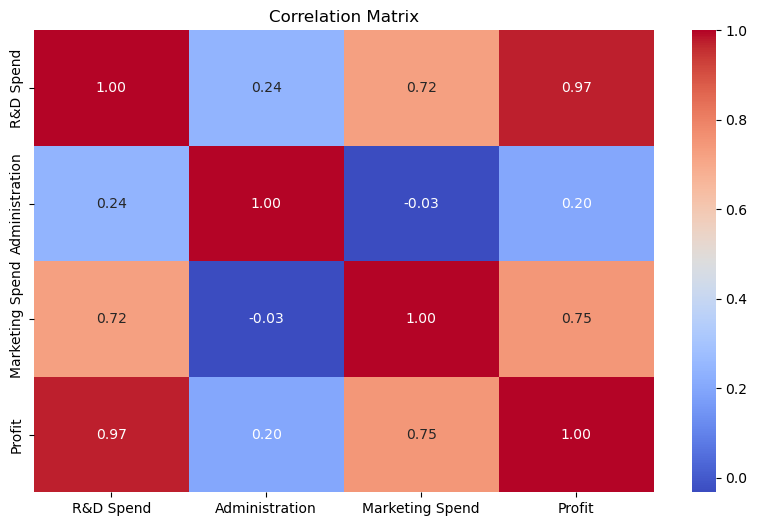

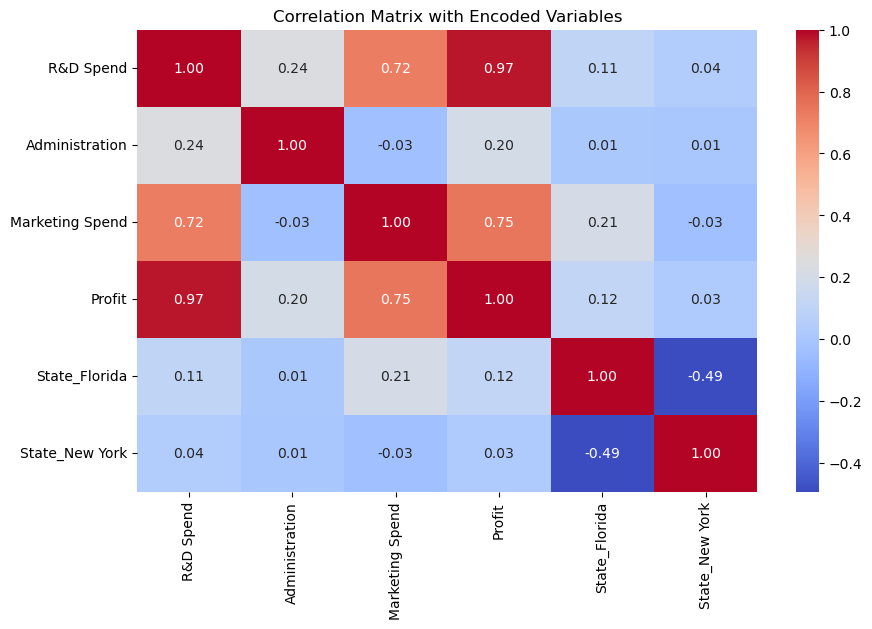

In [37]:
# Step c: Investigate the correlation between variables (only numeric columns)
numeric_df = df.select_dtypes(include='number')  # Select only numeric columns

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


# If 'State' is a categorical column, we can use one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical columns

# Now compute the correlation matrix
correlation_matrix_encoded = df_encoded.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix with Encoded Variables")
plt.show()


In [ ]:
#d) Choose appropriate variables to predict company profit

#From the correlation matrix, we can identify the variables most correlated with the target variable (Profit). We might choose variables that have the highest correlation with Profit as potential explanatory variables.

#Let's assume that R&D Spend, Administration, and Marketing Spend are the key variables for prediction based on their correlation with Profit.

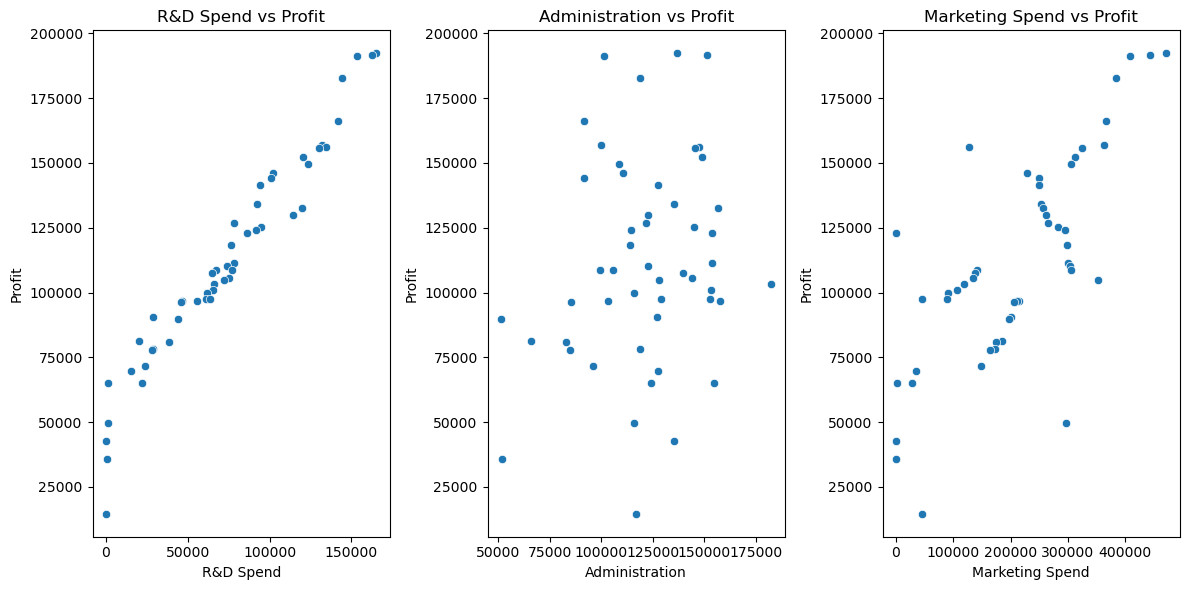

In [27]:
#e) Plot explanatory variables against profit to confirm linear dependence
# Step e: Plot explanatory variables against profit
plt.figure(figsize=(12, 6))

# Plot for R&D Spend vs Profit
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['R&D Spend'], y=df['Profit'])
plt.title('R&D Spend vs Profit')

# Plot for Administration vs Profit
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['Administration'], y=df['Profit'])
plt.title('Administration vs Profit')

# Plot for Marketing Spend vs Profit
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['Marketing Spend'], y=df['Profit'])
plt.title('Marketing Spend vs Profit')

plt.tight_layout()
plt.show()


In [29]:
#f) Form training and testing data (80/20 split)

from sklearn.model_selection import train_test_split

# Step f: Form training and testing data (80/20 split)
# We use R&D Spend, Administration, and Marketing Spend to predict Profit
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

# Split into training and testing data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")


Training set size: 40, Testing set size: 10


In [31]:
#g) Train a linear regression model with training data

from sklearn.linear_model import LinearRegression

# Step g: Train linear regression model with training data
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print the coefficients of the model (optional)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.80377928 -0.06792917  0.03124155]
Intercept: 54071.87574599086


In [33]:
#h) Compute RMSE and R² values for training and testing data separately

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step h: Compute RMSE and R² values for training and testing data separately
# RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

# RMSE for testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Print RMSE and R² for training and testing
print(f"RMSE (Train): {rmse_train:.2f}, R² (Train): {r2_train:.2f}")
print(f"RMSE (Test): {rmse_test:.2f}, R² (Test): {r2_test:.2f}")


RMSE (Train): 8938.01, R² (Train): 0.95
RMSE (Test): 8995.91, R² (Test): 0.90


In [ ]:
# Step 9: Findings and analysis of the model's performance

The RMSE (Root Mean Squared Error) for both the training and testing sets will give us an idea of how well 
the model fits the data. A lower RMSE indicates a better fit.

The R² value indicates the proportion of variance explained by the model. A high R² value (close to 1) suggests 
that the model is a good fit for the data. If R² is low, it may suggest the need for feature engineering or trying 
other models.

By comparing training and testing RMSE, we can assess if there is overfitting. Large discrepancies might indicate that 
the model is overfitting to the training data.

### Question 3

Consider car performance data from the file `Auto.csv`.

a) Read the data into pandas dataframe

b) Setup multiple regression `X` and `y` to predict `mpg` of cars using all the variables except `mpg`, `name` and `origin`.

c) Split data into training and testing sets (80/20 split)

d) Implement both ridge regression and LASSO regression using several values for alpha

e) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data

f) Plot the R2 scores for both regressors as functions of alpha

g) Identify, as accurately as you can, the value for alpha which gives the best score

 
Include your own findings and explanations in code comments or inside triple quotes """...""".

Initial data preview:
    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Missing values per column after cleaning:
mpg               0
cylinders         0
displacement      0
horsepower        5
weight            0
acceleration      0
year              0
origin            0
name            397
dtype: int64
Shape of the cleaned dataset: (397, 9)
Shape of the datase

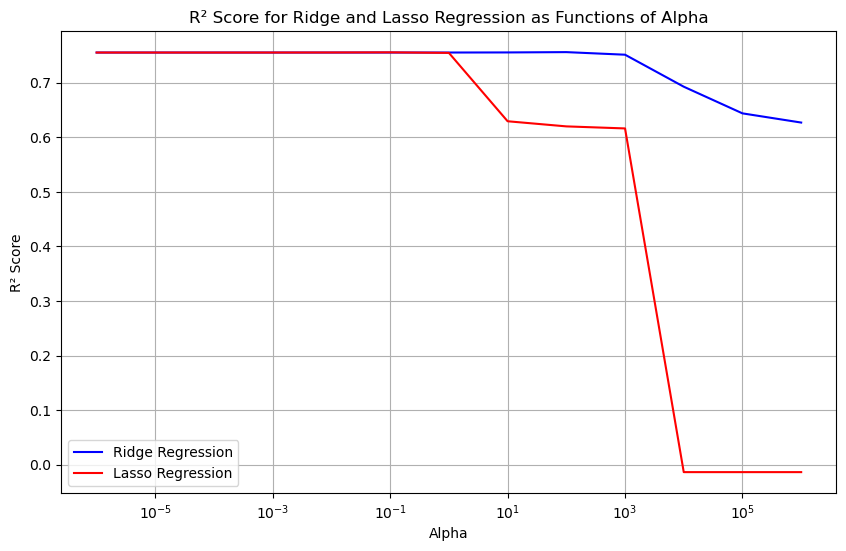

Best alpha for Ridge Regression: 100.0
Best alpha for Lasso Regression: 0.1


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

# Step 1: Read the data into pandas dataframe
df = pd.read_csv('Auto.csv')  # Replace with the correct file path

# Step 2: Inspect the first few rows to check for non-numeric data
print("Initial data preview:")
print(df.head())

# Step 3: Handle non-numeric values
# Replace non-numeric values (e.g., '?') with NaN in the entire dataframe
df.replace('?', np.nan, inplace=True)

# Step 4: Convert the columns to numeric values and handle missing data
df = df.apply(pd.to_numeric, errors='coerce')

# Step 5: Check if there are still any NaN values
print("Missing values per column after cleaning:")
print(df.isna().sum())

# Step 6: Check the shape of the dataset after cleaning
print("Shape of the cleaned dataset:", df.shape)

# Option 1: Drop rows with missing values
# df.dropna(inplace=True)

# Option 2: Impute missing values with the column mean (alternative approach)
df.fillna(df.mean(), inplace=True)

# Step 7: Check the shape again after imputation (if applicable)
print("Shape of the dataset after imputation:", df.shape)

# Ensure that we still have data to work with
if df.shape[0] == 0:
    raise ValueError("The dataset is empty after cleaning. Please check your data preprocessing steps.")

# Step 8: Setup multiple regression X and y to predict mpg
X = df.drop(columns=['mpg', 'name', 'origin'])  # Exclude 'mpg', 'name', 'origin'
y = df['mpg']  # Target variable is 'mpg'

# Step 9: Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Implement Ridge and Lasso regression using several values for alpha
alphas = np.logspace(-6, 6, 13)

# Initialize lists to store R² scores for both models
r2_ridge = []
r2_lasso = []

# Step 11: Search for optimal value of alpha (in terms of R2 score)
for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    r2_ridge.append(r2_score(y_test, y_pred_ridge))
    
    # Lasso regression
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_lasso.append(r2_score(y_test, y_pred_lasso))

# Step 12: Plot the R² scores for both regressors as functions of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_ridge, label='Ridge Regression', color='blue')
plt.plot(alphas, r2_lasso, label='Lasso Regression', color='red')
plt.xscale('log')  # Use a logarithmic scale for alpha
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score for Ridge and Lasso Regression as Functions of Alpha')
plt.legend()
plt.grid(True)
plt.show()

# Step 13: Identify the best alpha for both models
best_alpha_ridge = alphas[np.argmax(r2_ridge)]
best_alpha_lasso = alphas[np.argmax(r2_lasso)]

print(f"Best alpha for Ridge Regression: {best_alpha_ridge}")
print(f"Best alpha for Lasso Regression: {best_alpha_lasso}")
